# Visualización de Datos con Python

La visualización de datos permite transformar información numérica o categórica en representaciones gráficas interpretables.  
Con ella podemos **descubrir patrones**, **identificar anomalías**, **comunicar resultados** y **validar hipótesis** sobre los datos.

En este ejemplo utilizaremos el conjunto de datos `penguins`, disponible en `seaborn`, que contiene información biológica de tres especies de pingüinos: *Adelie*, *Chinstrap* y *Gentoo*.  
Incluye medidas como el largo y profundidad del pico, largo de las aletas, masa corporal, sexo y la isla de procedencia.

A lo largo del ejemplo se ilustran los tipos de visualizaciones más comunes:
- Gráficos de dispersión
- Histogramas y curvas de densidad
- Diagramas de caja
- Mapas de calor
- Pairplots (análisis multivariado)


In [ ]:
# Importación de bibliotecas necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carga del conjunto de datos "penguins" incluido en seaborn
df = sns.load_dataset("penguins")
"""['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 
 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'geyser', 'iris', 
 'mpg', 'penguins', 'planets', 'tips', 'titanic']
 """
# Vista general de las primeras filas del DataFrame
# Esto nos permite identificar las variables disponibles
print("Vista general del conjunto de datos:\n")
display(df.head())

# Información general sobre tipos de datos y valores nulos
print("\nInformación del DataFrame:")
print(df.info())

# Descripción estadística de las variables numéricas
print("\nResumen estadístico de las variables numéricas:")
display(df.describe())

# Eliminamos filas con valores faltantes para evitar errores en los gráficos
df = df.dropna()


Vista general del conjunto de datos:



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None

Resumen estadístico de las variables numéricas:


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


1. Gráfico de Dispersión — Relación entre Largo y Profundidad del Pico

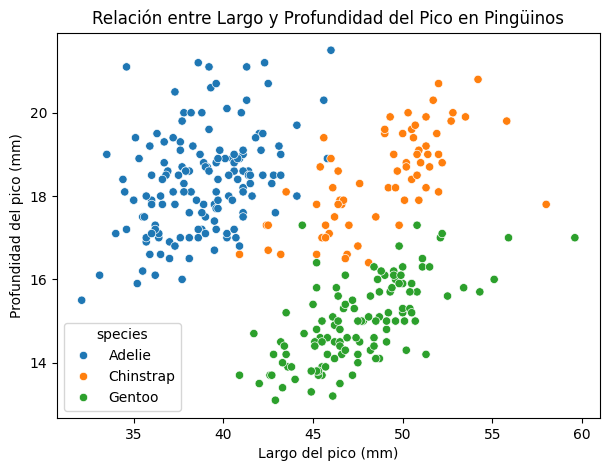

In [3]:
# Muestra la relación entre dos variables numéricas
# Diferenciando las especies con colores
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x="bill_length_mm", y="bill_depth_mm", hue="species")
plt.title("Relación entre Largo y Profundidad del Pico en Pingüinos")
plt.xlabel("Largo del pico (mm)")
plt.ylabel("Profundidad del pico (mm)")
plt.show()


2. Histograma y Curva de Densidad — Distribución del Largo de Aletas

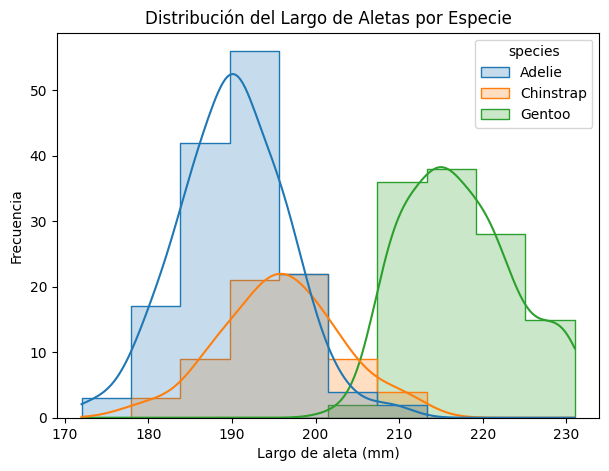

In [4]:
# Representa la distribución de una variable numérica
# Permite observar la forma, dispersión y posibles valores atípicos
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x="flipper_length_mm", hue="species", kde=True, element="step")
plt.title("Distribución del Largo de Aletas por Especie")
plt.xlabel("Largo de aleta (mm)")
plt.ylabel("Frecuencia")
plt.show()

3. Diagrama de Caja — Masa Corporal por Especie y Sexo

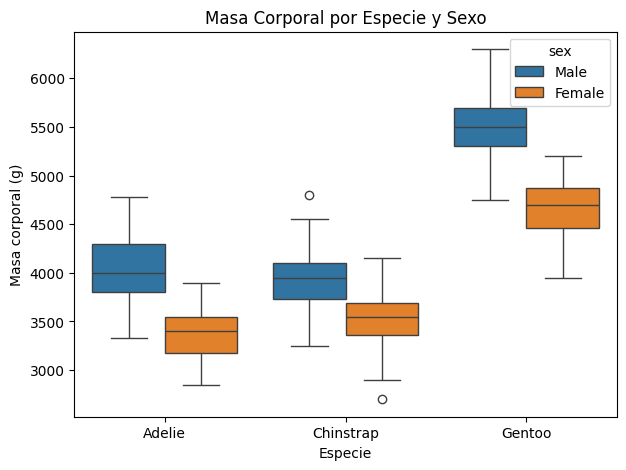

In [5]:
# Muestra la distribución, mediana y valores atípicos
# Es útil para comparar grupos categóricos
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="species", y="body_mass_g", hue="sex")
plt.title("Masa Corporal por Especie y Sexo")
plt.xlabel("Especie")
plt.ylabel("Masa corporal (g)")
plt.show()


4. Mapa de Calor — Correlación entre Variables Numéricas

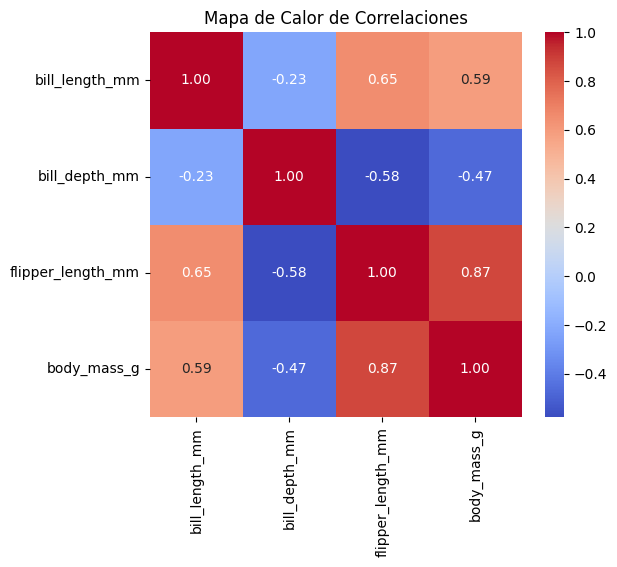

In [6]:
# Muestra las correlaciones entre variables numéricas
# Los valores cercanos a 1 o -1 indican relaciones fuertes
plt.figure(figsize=(6, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de Correlaciones")
plt.show()


5. Pairplot — Relaciones entre Todas las Variables Numéricas

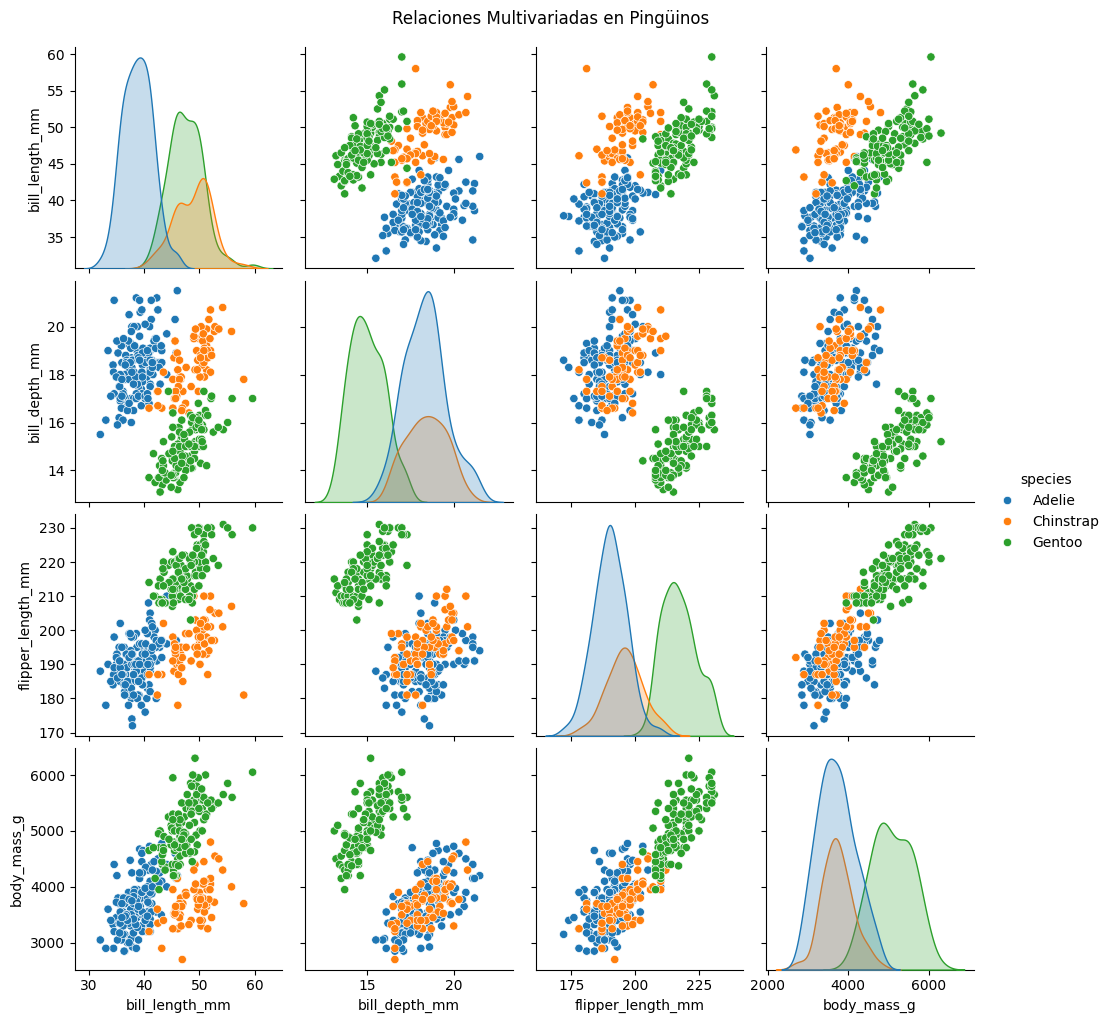

In [7]:
# Crea una matriz de gráficos de dispersión para observar relaciones entre todas las variables
# Incluye histogramas en la diagonal
sns.pairplot(df, hue="species", diag_kind="kde")
plt.suptitle("Relaciones Multivariadas en Pingüinos", y=1.02)
plt.show()


# Visualización con matplotlib.pyplot

matplotlib es una de las bibliotecas más utilizadas para crear gráficos en Python.
Su módulo pyplot permite generar figuras paso a paso: crear el lienzo, agregar datos, personalizar ejes y mostrar el resultado.

Tema: Visualización básica con Matplotlib y datos reales

Usaremos el dataset tips, que contiene información de propinas en un restaurante:

total_bill: total de la cuenta

tip: valor de la propina

sex: sexo del mesero/a

day: día de la semana

time: almuerzo o cena

size: número de personas en la mesa

Vista general del conjunto de datos:


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


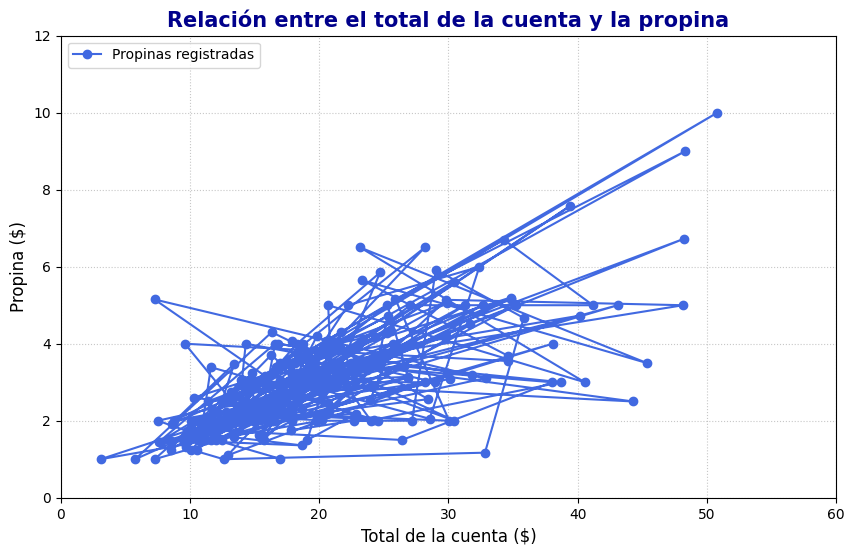

In [8]:
# ===============================================================
# VISUALIZACIÓN BÁSICA CON DATOS REALES USANDO MATPLOTLIB
# ===============================================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ---------------------------------------------------------------
# 1️⃣ Cargar el conjunto de datos
# ---------------------------------------------------------------
# El dataset "tips" viene incluido en seaborn.
# Contiene datos reales sobre propinas en un restaurante.
df = sns.load_dataset("tips")

# Visualizamos las primeras filas para entender la estructura del DataFrame
print("Vista general del conjunto de datos:")
display(df.head())

# ---------------------------------------------------------------
# 2️⃣ Crear la figura
# ---------------------------------------------------------------
# plt.figure() define el "lienzo" donde se dibujará el gráfico.
# figsize define el tamaño en pulgadas: (ancho, alto)
plt.figure(figsize=(10, 6))

# ---------------------------------------------------------------
# 3️⃣ Agregar datos al gráfico
# ---------------------------------------------------------------
# plt.plot(x, y) dibuja líneas conectando puntos.
# Aquí mostramos cómo cambia la propina respecto al total de la cuenta.
plt.plot(df["total_bill"], df["tip"], 
         color="royalblue",           # Color de la línea
         linestyle="-",               # Estilo de línea (continua)
         marker="o",                  # Marcador de puntos
         markersize=6,                # Tamaño de los marcadores
         linewidth=1.5,               # Grosor de la línea
         label="Propinas registradas") # Nombre para la leyenda

# ---------------------------------------------------------------
# 4️⃣ Personalizar el gráfico: títulos, etiquetas y leyenda
# ---------------------------------------------------------------
# plt.title() agrega un título general al gráfico.
# loc permite posicionarlo: 'left', 'center', o 'right'.
plt.title("Relación entre el total de la cuenta y la propina",
          fontsize=15, fontweight='bold', loc='center', color='darkblue')

# Etiquetas de los ejes
plt.xlabel("Total de la cuenta ($)", fontsize=12)
plt.ylabel("Propina ($)", fontsize=12)

# Leyenda (label configurado arriba)
plt.legend(loc='upper left')

# ---------------------------------------------------------------
# 5️⃣ Opciones adicionales útiles
# ---------------------------------------------------------------
# Agregar cuadrícula para mejor lectura
plt.grid(True, linestyle=':', alpha=0.7)

# Limitar los valores visibles de los ejes
plt.xlim(0, 60)
plt.ylim(0, 12)

# ---------------------------------------------------------------
# 6️⃣ Mostrar el gráfico
# ---------------------------------------------------------------
plt.show()


/var/folders/19/5cy24wkj2tj9z31t2rs3mmc00000gn/T/ipykernel_45104/2911784027.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedios = df.groupby("day")["tip"].mean()


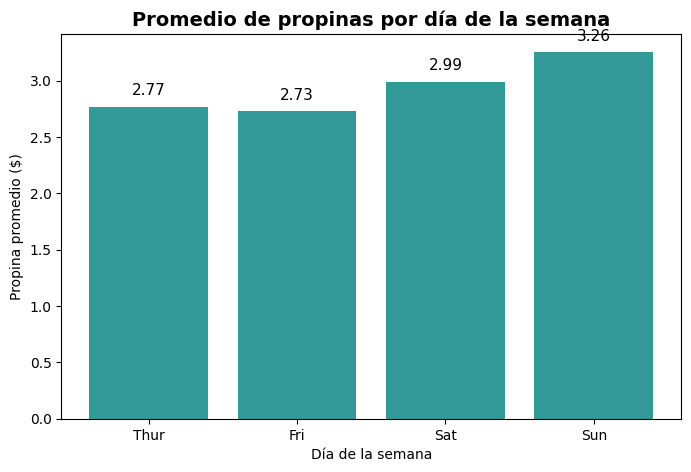

In [9]:
# ===============================================================
# COMPARACIÓN DE PROMEDIOS POR DÍA DE LA SEMANA
# ===============================================================

# Calculamos el promedio de propinas por día
promedios = df.groupby("day")["tip"].mean()

# Creamos una nueva figura
plt.figure(figsize=(8, 5))

# plt.bar() crea un gráfico de barras verticales
plt.bar(promedios.index, promedios.values, color="teal", alpha=0.8)

# Título y ejes
plt.title("Promedio de propinas por día de la semana", fontsize=14, fontweight='bold')
plt.xlabel("Día de la semana")
plt.ylabel("Propina promedio ($)")

# Agregar los valores encima de cada barra
for i, valor in enumerate(promedios.values):
    plt.text(i, valor + 0.1, f"{valor:.2f}", ha='center', fontsize=11)

plt.show()


/var/folders/19/5cy24wkj2tj9z31t2rs3mmc00000gn/T/ipykernel_45104/1309159430.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby("day")[["total_bill", "tip"]].mean()


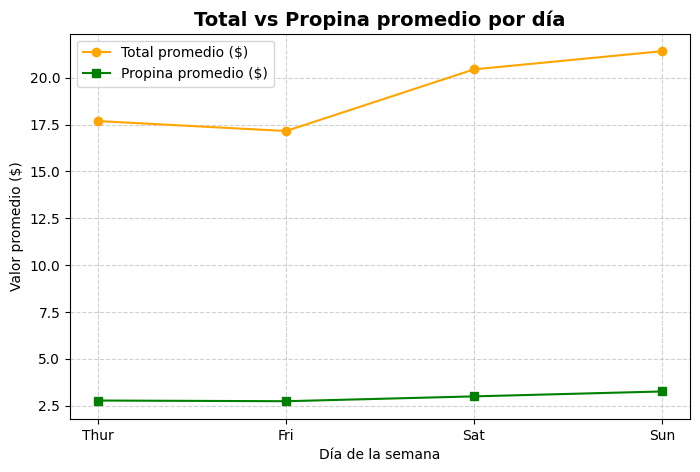

In [10]:
# ===============================================================
# COMPARACIÓN ENTRE TOTAL BILL Y TIP PROMEDIO POR DÍA
# ===============================================================

# Agrupamos el total y la propina promedio por día
grouped = df.groupby("day")[["total_bill", "tip"]].mean()

plt.figure(figsize=(8, 5))

# Línea del total promedio
plt.plot(grouped.index, grouped["total_bill"], 
         marker='o', color='orange', label="Total promedio ($)")

# Línea de la propina promedio
plt.plot(grouped.index, grouped["tip"], 
         marker='s', color='green', label="Propina promedio ($)")

# Título y etiquetas
plt.title("Total vs Propina promedio por día", fontsize=14, fontweight='bold')
plt.xlabel("Día de la semana")
plt.ylabel("Valor promedio ($)")

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


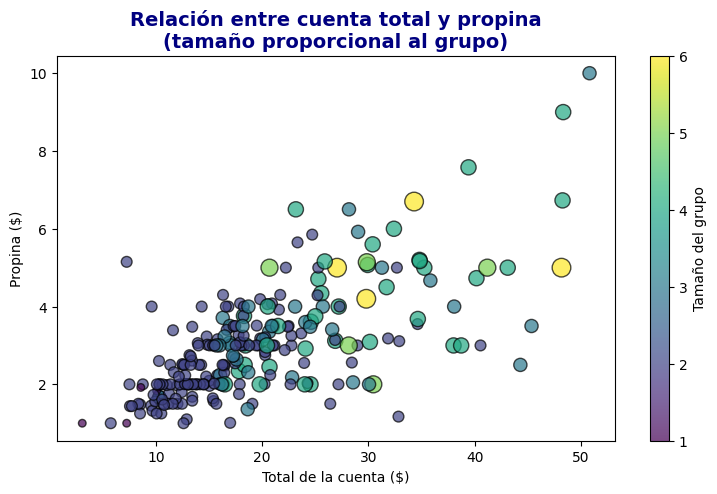

In [11]:
# ===============================================================
# GRÁFICO CON PERSONALIZACIÓN ESTÉTICA
# ===============================================================

plt.figure(figsize=(9, 5))

# Gráfico de dispersión (scatter)
plt.scatter(df["total_bill"], df["tip"], 
            c=df["size"],           # Color basado en el tamaño del grupo
            cmap="viridis",         # Mapa de color
            s=df["size"] * 30,      # Tamaño del punto proporcional al grupo
            alpha=0.7, edgecolor='k')

plt.title("Relación entre cuenta total y propina\n(tamaño proporcional al grupo)",
          fontsize=14, fontweight='bold', color='navy')
plt.xlabel("Total de la cuenta ($)")
plt.ylabel("Propina ($)")

# Barra de color para interpretar los tamaños
plt.colorbar(label="Tamaño del grupo")

plt.show()


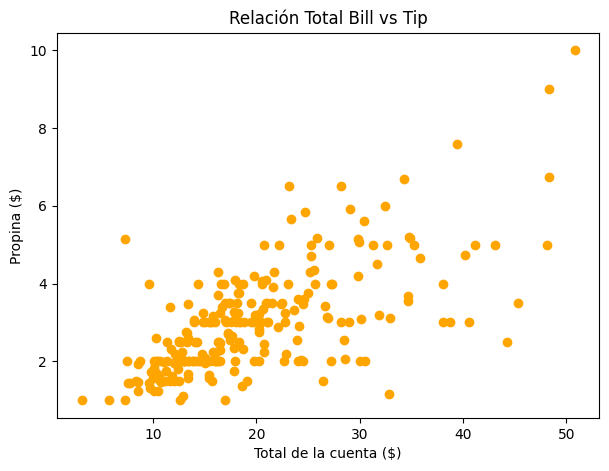

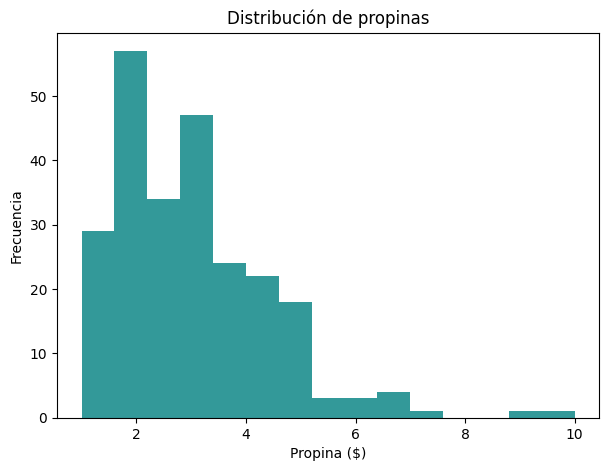

In [12]:
# Primer gráfico
plt.figure(figsize=(7, 5))
plt.scatter(df["total_bill"], df["tip"], color="orange")
plt.title("Relación Total Bill vs Tip")
plt.xlabel("Total de la cuenta ($)")
plt.ylabel("Propina ($)")
plt.show()

# Segundo gráfico (nueva figura)
plt.figure(figsize=(7, 5))
plt.hist(df["tip"], bins=15, color="teal", alpha=0.8)
plt.title("Distribución de propinas")
plt.xlabel("Propina ($)")
plt.ylabel("Frecuencia")
plt.show()


/var/folders/19/5cy24wkj2tj9z31t2rs3mmc00000gn/T/ipykernel_45104/534301379.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([df[df["sex"] == "Male"]["tip"], df[df["sex"] == "Female"]["tip"]],


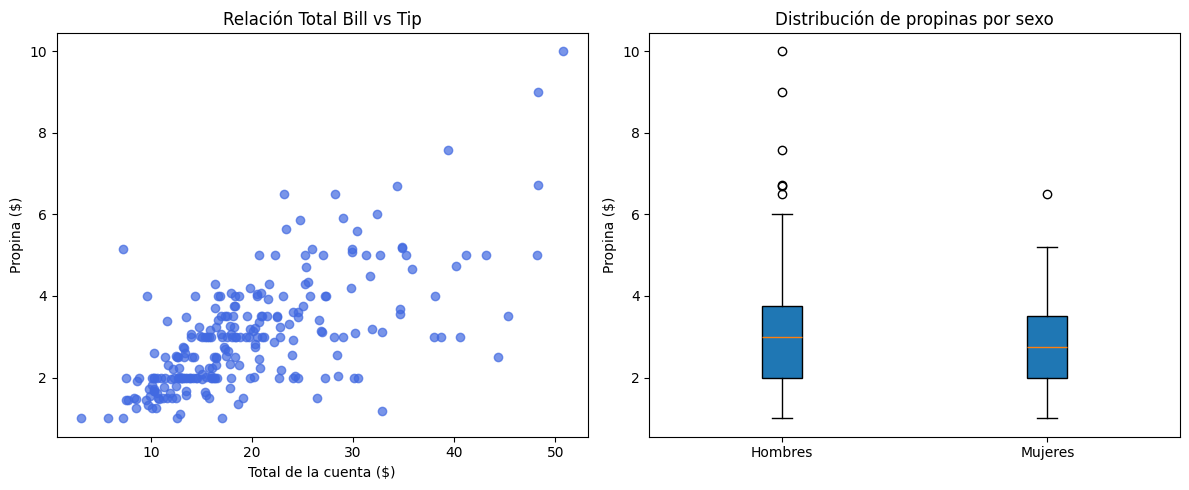

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos datos reales
df = sns.load_dataset("tips")

# Crear una figura con 1 fila y 2 columnas de gráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Primer gráfico: scatterplot
axes[0].scatter(df["total_bill"], df["tip"], color="royalblue", alpha=0.7)
axes[0].set_title("Relación Total Bill vs Tip")
axes[0].set_xlabel("Total de la cuenta ($)")
axes[0].set_ylabel("Propina ($)")

# Segundo gráfico: boxplot
axes[1].boxplot([df[df["sex"] == "Male"]["tip"], df[df["sex"] == "Female"]["tip"]],
                labels=["Hombres", "Mujeres"], patch_artist=True)
axes[1].set_title("Distribución de propinas por sexo")
axes[1].set_ylabel("Propina ($)")

plt.tight_layout()
plt.show()


## 📘 Resumen de lo aprendido

A continuación se presentan los elementos principales utilizados en la construcción de gráficos con **Matplotlib (`pyplot`)**, junto con su propósito:

| 🧩 **Elemento** | 💻 **Código base** | 🎯 **Función principal** |
|-----------------|--------------------|---------------------------|
| 🎨 **Crear figura** | `plt.figure(figsize=(10, 6))` | Define el tamaño del lienzo donde se dibujará el gráfico. |
| 📈 **Agregar datos** | `plt.plot(x, y)`  ó  `plt.bar(x, y)` | Dibuja líneas, puntos o barras con los datos definidos. |
| 🏷️ **Título** | `plt.title('Texto descriptivo')` | Agrega un título que contextualiza el gráfico. |
| 📊 **Ejes** | `plt.xlabel('Eje X')`<br>`plt.ylabel('Eje Y')` | Nombra las variables representadas en cada eje. |
| 🗂️ **Leyenda** | `plt.legend()` | Identifica cada serie o categoría representada en el gráfico. |
| 🔢 **Cuadrícula** | `plt.grid(True)` | Añade una cuadrícula que mejora la lectura y precisión visual. |
| 📏 **Límites de ejes** | `plt.xlim()`, `plt.ylim()` | Controla el rango visible de los ejes X e Y. |
| 👁️ **Mostrar** | `plt.show()` | Renderiza y muestra el gráfico final en pantalla. |

---

📌 **Consejo práctico:**  
La secuencia más común al construir un gráfico es:  
1. Crear la figura (`plt.figure()`)  
2. Agregar los datos (`plt.plot()` o `plt.bar()`)  
3. Personalizar con títulos, ejes y leyenda  
4. Ajustar detalles visuales (límites, cuadrícula)  
5. Mostrar el resultado (`plt.show()`)


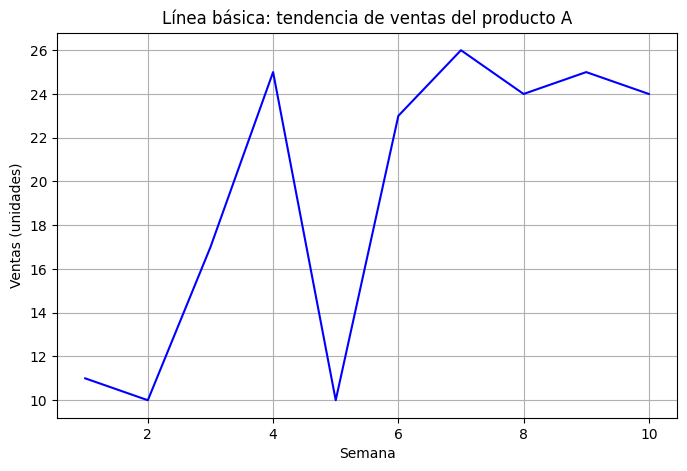

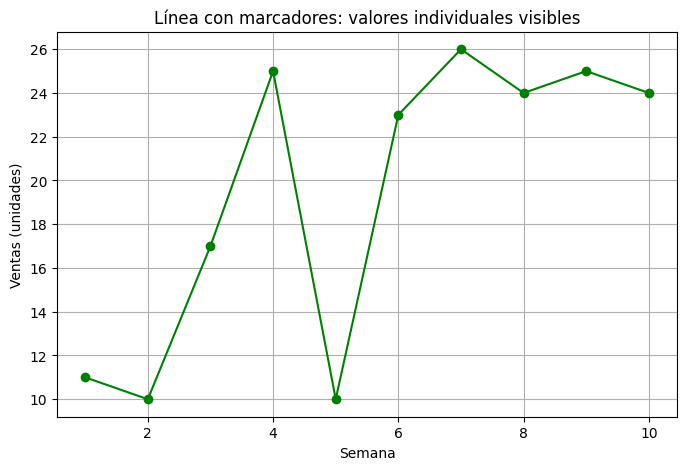

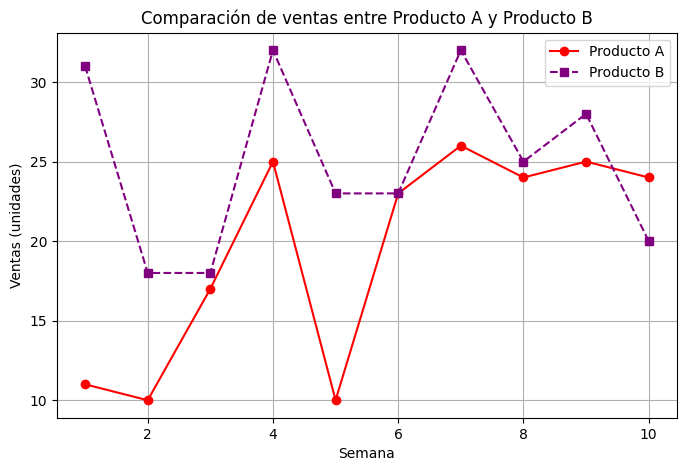

In [17]:
# =============================================================
# 📊 Ejemplo claro y didáctico con datos sintéticos
# =============================================================

import matplotlib.pyplot as plt
import numpy as np

# Creamos datos sintéticos ordenados
x = np.arange(1, 11)  # 10 valores para el eje X (por ejemplo, semanas)
y1 = np.random.randint(10, 30, size=10)  # ventas del producto A
y2 = np.random.randint(15, 35, size=10)  # ventas del producto B

# =============================================================
# 1️⃣ Línea básica
# =============================================================
plt.figure(figsize=(8, 5))
plt.plot(x, y1, color='blue')
plt.title("Línea básica: tendencia de ventas del producto A")
plt.xlabel("Semana")
plt.ylabel("Ventas (unidades)")
plt.grid(True)
plt.show()

# =============================================================
# 2️⃣ Línea con marcadores
# =============================================================
plt.figure(figsize=(8, 5))
plt.plot(x, y1, marker='o', linestyle='-', color='green')
plt.title("Línea con marcadores: valores individuales visibles")
plt.xlabel("Semana")
plt.ylabel("Ventas (unidades)")
plt.grid(True)
plt.show()

# =============================================================
# 3️⃣ Múltiples series en una sola figura
# =============================================================
plt.figure(figsize=(8, 5))
plt.plot(x, y1, marker='o', linestyle='-', color='red', label='Producto A')
plt.plot(x, y2, marker='s', linestyle='--', color='purple', label='Producto B')
plt.title("Comparación de ventas entre Producto A y Producto B")
plt.xlabel("Semana")
plt.ylabel("Ventas (unidades)")
plt.legend()
plt.grid(True)
plt.show()


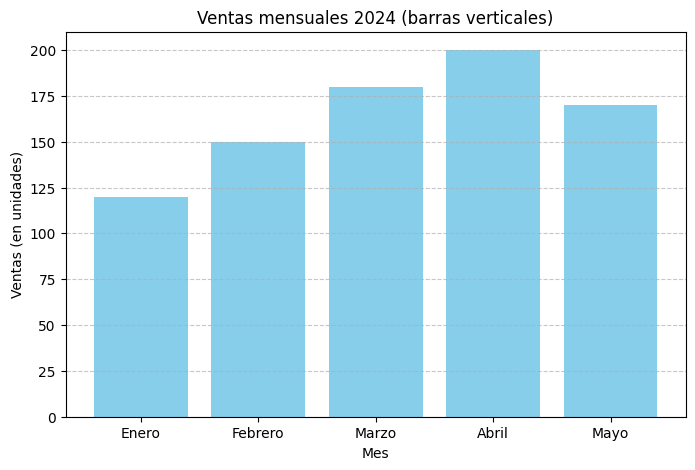

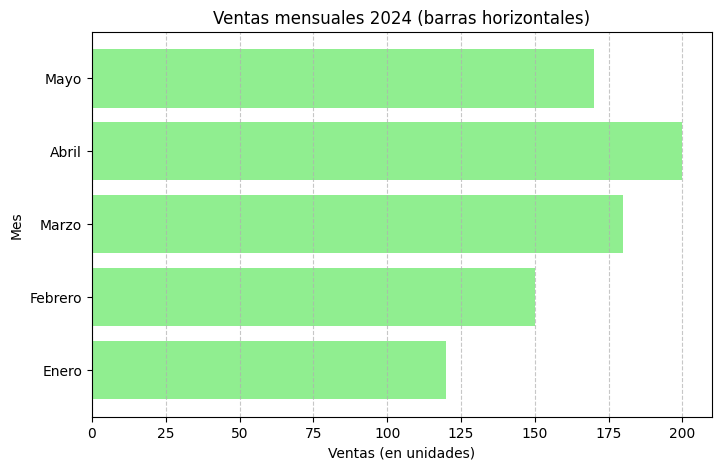

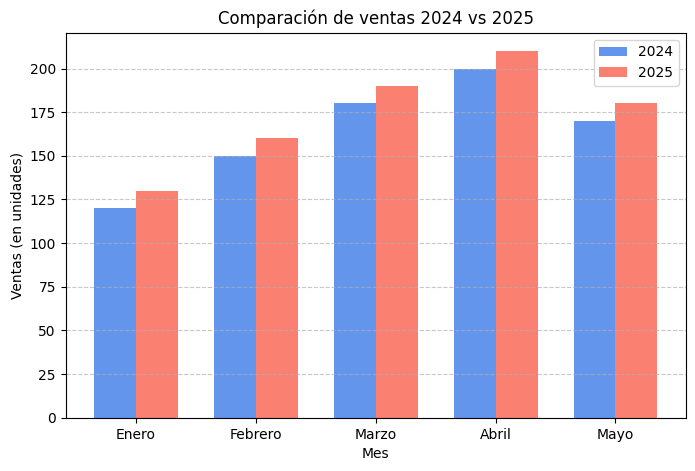

In [18]:
# =============================================================
# 📊 Ejemplos de gráficos de barras en Matplotlib
# =============================================================

import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------------------------------
# Datos sintéticos de ejemplo
# -------------------------------------------------------------
categorias = ["Enero", "Febrero", "Marzo", "Abril", "Mayo"]
ventas_2024 = [120, 150, 180, 200, 170]
ventas_2025 = [130, 160, 190, 210, 180]

# =============================================================
# 1️⃣ Barras verticales
# =============================================================
plt.figure(figsize=(8, 5))
plt.bar(categorias, ventas_2024, color='skyblue')
plt.title("Ventas mensuales 2024 (barras verticales)")
plt.xlabel("Mes")
plt.ylabel("Ventas (en unidades)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 💬 Explicación:
# - plt.bar() crea barras verticales.
# - Ideal para comparar magnitudes entre categorías discretas.

# =============================================================
# 2️⃣ Barras horizontales
# =============================================================
plt.figure(figsize=(8, 5))
plt.barh(categorias, ventas_2024, color='lightgreen')
plt.title("Ventas mensuales 2024 (barras horizontales)")
plt.xlabel("Ventas (en unidades)")
plt.ylabel("Mes")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 💬 Explicación:
# - plt.barh() dibuja barras horizontales.
# - Muy útil cuando las etiquetas de categorías son largas o numerosas.

# =============================================================
# 3️⃣ Barras agrupadas (comparación entre dos años)
# =============================================================
x = np.arange(len(categorias))  # posiciones para cada categoría
width = 0.35  # ancho de cada barra

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, ventas_2024, width=width, label='2024', color='cornflowerblue')
plt.bar(x + width/2, ventas_2025, width=width, label='2025', color='salmon')

plt.title("Comparación de ventas 2024 vs 2025")
plt.xlabel("Mes")
plt.ylabel("Ventas (en unidades)")
plt.xticks(x, categorias)  # reemplaza los índices por los nombres de los meses
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 💬 Explicación:
# - plt.bar(x - width/2, y1) y plt.bar(x + width/2, y2)
#   permiten visualizar dos grupos de datos lado a lado.
# - Muy usado para comparar años, productos o categorías similares.


## 📘 Tipos de gráficos de barras en Matplotlib

| **Tipo** | **Sintaxis** | **Aplicación** |
|-----------|---------------|----------------|
| **Verticales** | `plt.bar(categorias, valores)` | Comparaciones estándar entre categorías. |
| **Horizontales** | `plt.barh(categorias, valores)` | Ideal cuando las etiquetas son largas o numerosas. |
| **Agrupadas** | `plt.bar(x, y1); plt.bar(x+width, y2)` | Permite comparar múltiples variables o periodos. |

📌 **Consejo:**  
Usa colores distintos y leyendas para mejorar la interpretación cuando compares varias series.


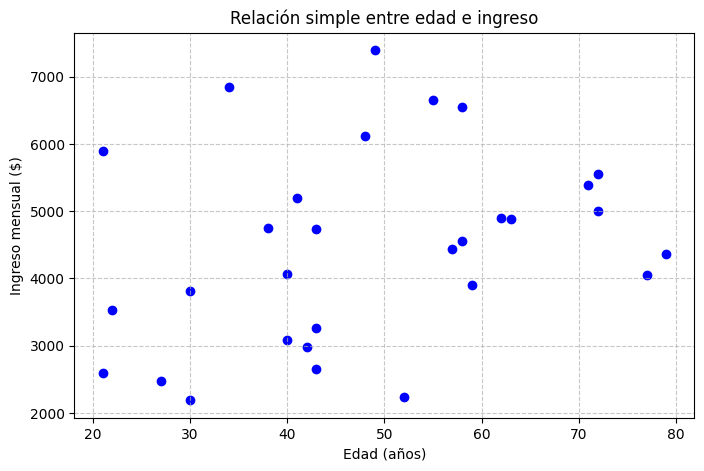

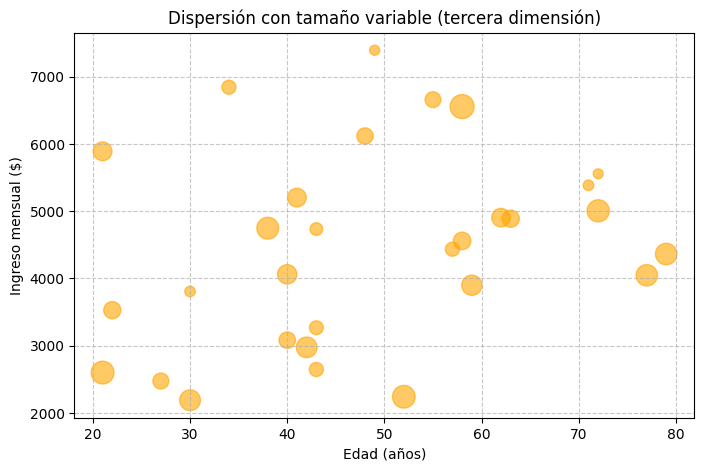

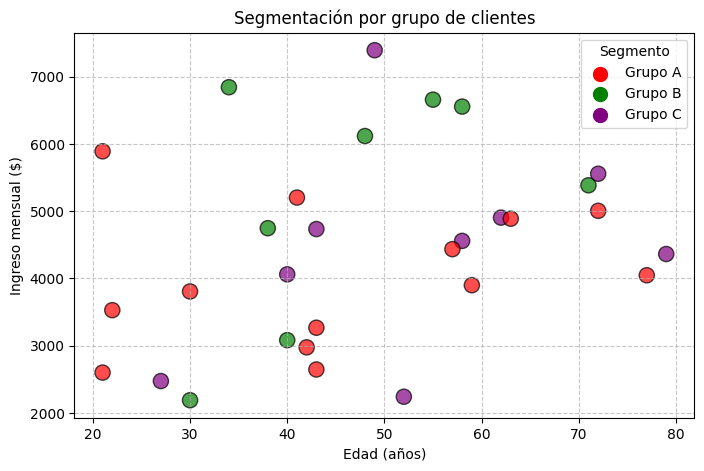

In [19]:
# =============================================================
# 📊 Ejemplos de gráficos de dispersión (scatter plot)
# =============================================================

import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------------------------------
# Generamos datos sintéticos
# -------------------------------------------------------------
np.random.seed(42)

x = np.random.randint(20, 80, size=30)      # edad de personas
y = np.random.randint(2000, 8000, size=30)  # ingresos mensuales ($)
tamanos = np.random.randint(50, 300, size=30)  # tamaño del punto
categorias = np.random.choice(['A', 'B', 'C'], size=30)  # grupo o segmento

# =============================================================
# 1️⃣ Relación simple
# =============================================================
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue')
plt.title("Relación simple entre edad e ingreso")
plt.xlabel("Edad (años)")
plt.ylabel("Ingreso mensual ($)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 💬 Explicación:
# - Cada punto representa una persona.
# - Permite observar si a mayor edad hay mayor ingreso (correlación).

# =============================================================
# 2️⃣ Tamaño variable (tercera dimensión)
# =============================================================
plt.figure(figsize=(8, 5))
plt.scatter(x, y, s=tamanos, color='orange', alpha=0.6)
plt.title("Dispersión con tamaño variable (tercera dimensión)")
plt.xlabel("Edad (años)")
plt.ylabel("Ingreso mensual ($)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 💬 Explicación:
# - El parámetro `s` ajusta el tamaño de los puntos.
# - Simula una tercera variable (por ejemplo, gasto promedio o cantidad de compras).

# =============================================================
# 3️⃣ Colores por grupo (segmentación)
# =============================================================
# Asignamos un color diferente por categoría
colores = {'A': 'red', 'B': 'green', 'C': 'purple'}
colores_mapeados = [colores[c] for c in categorias]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, c=colores_mapeados, s=120, alpha=0.7, edgecolors='black')
plt.title("Segmentación por grupo de clientes")
plt.xlabel("Edad (años)")
plt.ylabel("Ingreso mensual ($)")
plt.grid(True, linestyle='--', alpha=0.7)

# Agregamos una leyenda manual
for grupo, color in colores.items():
    plt.scatter([], [], c=color, label=f'Grupo {grupo}', s=100)
plt.legend(title="Segmento")

plt.show()

# 💬 Explicación:
# - El parámetro `c` permite colorear puntos según una categoría.
# - Ideal para visualizar segmentaciones, clases o grupos.


## 📘 Gráficos de dispersión (`plt.scatter`)

| **Tipo** | **Sintaxis** | **Aplicación** |
|-----------|---------------|----------------|
| **Puntos básicos** | `plt.scatter(x, y)` | Muestra la relación entre dos variables numéricas. |
| **Tamaño variable** | `plt.scatter(x, y, s=tamaños)` | Representa una tercera dimensión (por ejemplo, cantidad, volumen o peso). |
| **Colores por grupo** | `plt.scatter(x, y, c=categorias)` | Permite segmentar o clasificar visualmente los datos. |

📌 **Consejo:**  
Los gráficos de dispersión son ideales para:
- Detectar correlaciones entre variables.  
- Identificar agrupamientos o clústeres naturales.  
- Encontrar valores atípicos (outliers).


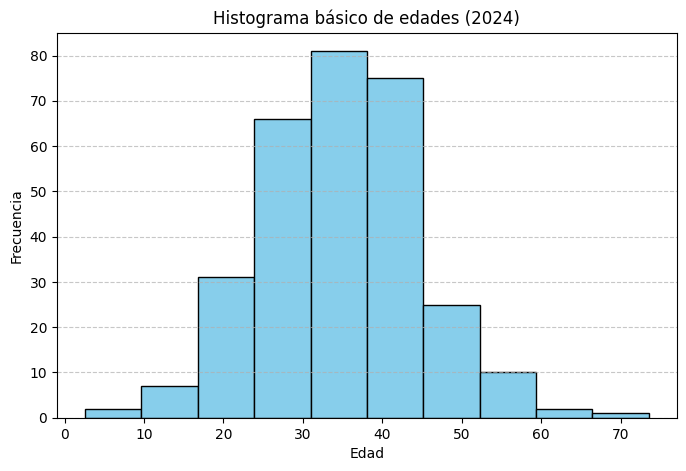

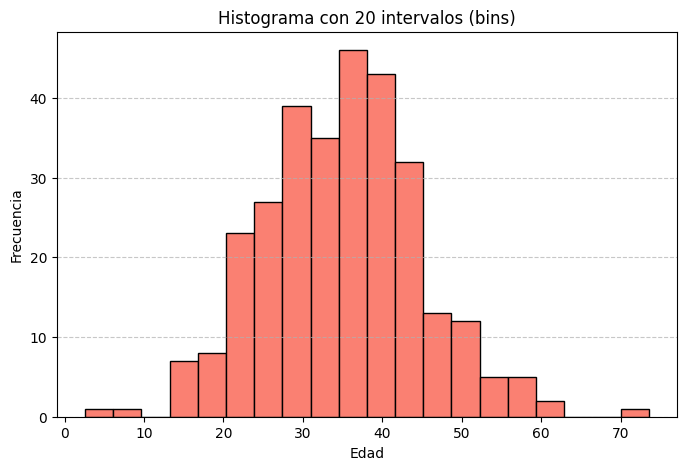

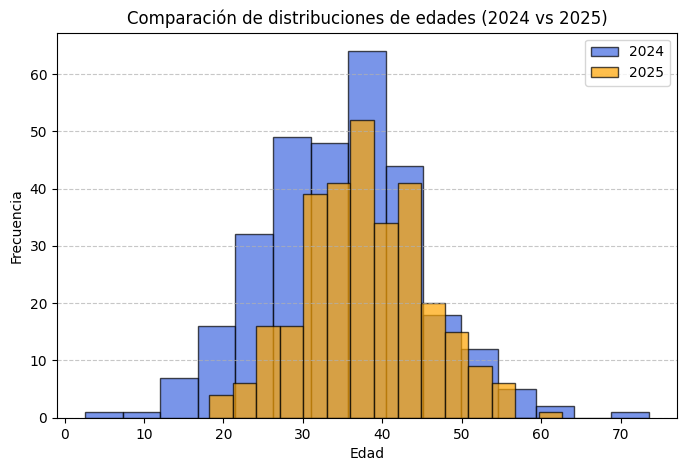

In [20]:
# =============================================================
# 📊 Ejemplos de histogramas en Matplotlib
# =============================================================

import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------------------------------
# Datos sintéticos: simulamos edades de clientes
# -------------------------------------------------------------
np.random.seed(42)
edades_2024 = np.random.normal(35, 10, 300)   # media=35, desviación=10
edades_2025 = np.random.normal(38, 8, 300)    # otra distribución para comparar

# =============================================================
# 1️⃣ Histograma básico
# =============================================================
plt.figure(figsize=(8, 5))
plt.hist(edades_2024, color='skyblue', edgecolor='black')
plt.title("Histograma básico de edades (2024)")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 💬 Explicación:
# - Muestra la distribución de frecuencias de un conjunto de datos.
# - Por defecto, Matplotlib elige automáticamente los intervalos (bins).

# =============================================================
# 2️⃣ Control de granularidad con 'bins'
# =============================================================
plt.figure(figsize=(8, 5))
plt.hist(edades_2024, bins=20, color='salmon', edgecolor='black')
plt.title("Histograma con 20 intervalos (bins)")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 💬 Explicación:
# - El parámetro `bins` controla el número de divisiones.
# - Más bins → mayor detalle; menos bins → visión más general.

# =============================================================
# 3️⃣ Comparar dos distribuciones con transparencia
# =============================================================
plt.figure(figsize=(8, 5))
plt.hist(edades_2024, bins=15, alpha=0.7, label='2024', color='royalblue', edgecolor='black')
plt.hist(edades_2025, bins=15, alpha=0.7, label='2025', color='orange', edgecolor='black')
plt.title("Comparación de distribuciones de edades (2024 vs 2025)")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 💬 Explicación:
# - El parámetro `alpha` ajusta la transparencia de las barras.
# - Permite visualizar varias distribuciones en la misma figura.


## 📘 Histogramas en Matplotlib (`plt.hist`)

| **Tipo** | **Sintaxis** | **Aplicación** |
|-----------|---------------|----------------|
| **Básico** | `plt.hist(datos)` | Muestra las frecuencias de los valores de una variable numérica. |
| **Intervalos (bins)** | `plt.hist(datos, bins=20)` | Ajusta el número de intervalos o nivel de detalle. |
| **Transparencia (comparación)** | `plt.hist(datos, alpha=0.7)` | Superpone y compara múltiples distribuciones. |

📌 **Consejos prácticos:**
- Usa `edgecolor='black'` para mejorar la definición visual de las barras.  
- `bins` controla la granularidad del histograma.  
- `alpha` facilita la comparación entre varias series de datos.  
- Los histogramas ayudan a detectar **asimetrías, concentraciones y valores atípicos**.


# Buenas practicas

/var/folders/19/5cy24wkj2tj9z31t2rs3mmc00000gn/T/ipykernel_45104/1809767396.py:61: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/19/5cy24wkj2tj9z31t2rs3mmc00000gn/T/ipykernel_45104/1809767396.py:61: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/alex_espinosa/Documents/New_order/Guayerd/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/alex_espinosa/Documents/New_order/Guayerd/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


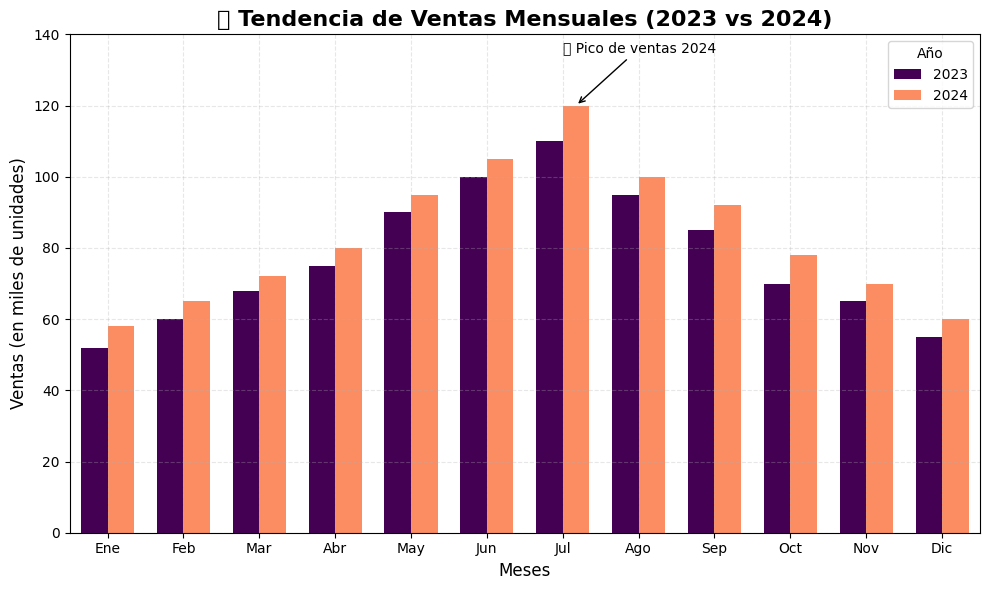

In [24]:
# ============================================================
# 📊 Ejemplo completo de buenas prácticas en visualización
# ============================================================

import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
meses = ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]
ventas_2023 = [52, 60, 68, 75, 90, 100, 110, 95, 85, 70, 65, 55]
ventas_2024 = [58, 65, 72, 80, 95, 105, 120, 100, 92, 78, 70, 60]

# ============================================================
# 1️⃣ TÍTULOS: Claros, informativos y con contexto
# Evitar títulos genéricos como "Gráfico 1" o "Datos"
# ============================================================
plt.figure(figsize=(10, 6))
plt.title("📈 Tendencia de Ventas Mensuales (2023 vs 2024)", fontsize=16, fontweight='bold')

# ============================================================
# 2️⃣ COLORES: Consistentes, con contraste y buena visibilidad
# Usar paletas perceptuales como 'Paired', 'Set2', 'viridis', etc.
# ============================================================
x = np.arange(len(meses))
width = 0.35  # ancho de las barras para mostrar comparaciones lado a lado

plt.bar(x - width/2, ventas_2023, width=width, label='2023', color=plt.cm.viridis(0))
plt.bar(x + width/2, ventas_2024, width=width, label='2024', color=plt.cm.Set2(1))

# ============================================================
# 3️⃣ TEXTO: Legible, proporcional y con etiquetas claras
# Usar tamaños de fuente equilibrados y nombres entendibles
# ============================================================
plt.xlabel("Meses", fontsize=12)
plt.ylabel("Ventas (en miles de unidades)", fontsize=12)
plt.xticks(x, meses, rotation=0)  # Evitar inclinación innecesaria de texto

# ============================================================
# 4️⃣ EJES: Escalas completas, proporcionales y con límites adecuados
# Evitar manipular escalas para exagerar diferencias
# ============================================================
plt.ylim(0, max(max(ventas_2023), max(ventas_2024)) + 20)
plt.xlim(-0.5, len(meses) - 0.5)

# ============================================================
# 5️⃣ CLARIDAD: Priorizar simplicidad y comunicación
# Incluir cuadrícula sutil, leyenda clara y resaltar puntos importantes
# ============================================================
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(title="Año", fontsize=10)

# Resaltar el punto máximo de ventas
max_index = np.argmax(ventas_2024)
plt.annotate("📍 Pico de ventas 2024",
             xy=(x[max_index]+width/2, ventas_2024[max_index]),
             xytext=(x[max_index], ventas_2024[max_index] + 15),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10, color='black')

# Mostrar el gráfico final
plt.tight_layout()
plt.show()

